# **Cab booking system**

Cab booking system is the process where renting a cab is automated through an app throughout a city. Using this app people can book a cab from one location to another location. Being a cab booking app company, exploiting an understanding of cab supply and demand could increase the efficiency of their service and enhance user experience by minimizing waiting time.

Refer the code at [GitHub](https://github.com/ypslearnings/CabBookingSystem/tree/main)

**Objective** of this project is to combine historical usage pattern along with the open data sources like weather data to forecast cab booking demand in a city.

# 1. Import required libraries

In [145]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.figure_factory import create_table
import plotly.express as px

# 2. Analyze the dataset and write your observations

In [89]:
train_df = pd.read_csv("data/train.csv")
train_label_df = pd.read_csv("data/train_label.csv", header=None, names=['Total_booking'])
test_df = pd.read_csv("data/test.csv")
test_label_df = pd.read_csv("data/test_label.csv", header=None, names=['Total_booking'])

In [90]:
# Append the train_label.csv to train.csv join the two datasets based on the 'id' column
train_df = pd.concat([train_df, train_label_df['Total_booking']], axis=1)
# Append the test_label.csv to test.csv join the two datasets based on the 'id' column
test_df = pd.concat([test_df, test_label_df['Total_booking']], axis=1)

### a. Check the shape of the training and testing set

In [91]:
train_df.shape

(8708, 10)

In [92]:
test_df.shape

(2178, 10)

### b. Print the data types of each column

In [93]:
train_df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [94]:
test_df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

### c. Check the missing values present in the dataset

In [95]:
# train set
train_df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

In [96]:
# test set
test_df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

# 3. Perform Feature Engineering

### a. Create new columns date, hour, weekDay, month from datetime column

In [97]:
# Train set - convert the 'date_time' column to datetime format
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
# Test set - convert the 'date_time' column to datetime format
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Train set - create new columns for date, hour, week day, and month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['weekDay'] = train_df['datetime'].dt.weekday
train_df['month'] = train_df['datetime'].dt.month

# Train set - create new columns for date, hour, week day, and month
test_df['date'] = test_df['datetime'].dt.date
test_df['hour'] = test_df['datetime'].dt.hour
test_df['weekDay'] = test_df['datetime'].dt.weekday
test_df['month'] = test_df['datetime'].dt.month

### b. Coerce the datatype of season, holiday, workingday, and weather to category

In [98]:
# Train set - coerce the datatype of fields to category : object or string
train_df['season'] = train_df['season'].astype('object')
train_df['holiday'] = train_df['holiday'].astype('object')
train_df['workingday'] = train_df['workingday'].astype('object')
train_df['weather'] = train_df['weather'].astype('object')

# Test set - coerce the datatype of fields to category : object or string
test_df['season'] = test_df['season'].astype('object')
test_df['holiday'] = test_df['holiday'].astype('object')
test_df['workingday'] = test_df['workingday'].astype('object')
test_df['weather'] = test_df['weather'].astype('object')

In [99]:
train_df.dtypes

datetime         datetime64[ns]
season                   object
holiday                  object
workingday               object
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
hour                      int64
weekDay                   int64
month                     int64
dtype: object

In [100]:
test_df.dtypes

datetime         datetime64[ns]
season                   object
holiday                  object
workingday               object
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
date                     object
hour                      int64
weekDay                   int64
month                     int64
dtype: object

### c. Drop the datetime column as we have already extracted useful features from it

In [101]:
# Train set - drop the datetime column
train_df.drop('datetime', axis=1, inplace=True)
# Test set - drop the datetime column
test_df.drop('datetime', axis=1, inplace=True)

In [102]:
# Train set 
print('Train Set columns')
print(train_df.columns)
print('===================')
# Test set 
print('Test Set columns')
print(test_df.columns)

Train Set columns
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekDay',
       'month'],
      dtype='object')
Test Set columns
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekDay',
       'month'],
      dtype='object')


# 4. Perform Outlier Analysis

## a. Plot Box plots across various features like season, houroftheday, working_day, etc to see if there are any Outlier and note down your inference

In [144]:
# Box plot - Season

# #As the season is a categorical column and Box plot required a numerical data to plot, 
# # map categorical values to numerical values
# season_mapping = {'Summer': 1, 'Fall': 2, 'Winter': 3}
# train_df['Season_num'] = train_df['season'].map(season_mapping)
# # plot a box plot of the 'Season_num' column
# #sns.boxplot(train_df['Season_num'])
# sns.boxplot(x='Season_num', data=train_df)
fig = px.box(x="season", y="Total_booking", data_frame=train_df, color="season", notched=True,
       category_orders={"season": ["Summer", "Fall", "Spring", "Winter"]})
fig.show()
#sns.boxplot(x="season", y="Total_booking", data=train_df, palette="Set2")
#sns.set_style('whitegrid')
# plt.title('Box plot of Season')
# plt.suptitle('')
# #plt.xticks(ticks=[0, 1, 2], labels=['Summer', 'Fall', 'Winter'])
# plt.xlabel('Season')
# plt.show()

### Inference: Season Box plot
Most of the Cabs were booked in similar numbers during all seasons except Spring. The outliers indicate that there were some unusual circumstances or events that affected the demand for cab bookings during that season, leading to a few very high or very low values for 'Total_booking'.

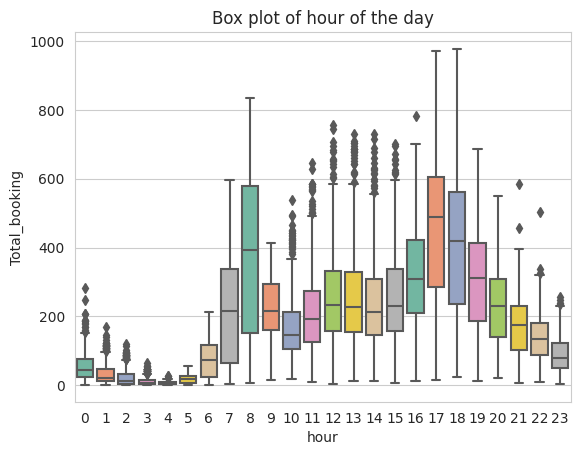

In [126]:
# Box plot - Hour
sns.boxplot(x='hour', y = 'Total_booking', data=train_df, palette="Set2")
#sns.set_style('whitegrid')
plt.title('Box plot of hour of the day')
plt.suptitle('')
plt.show()

### Inference: Hour Box plot

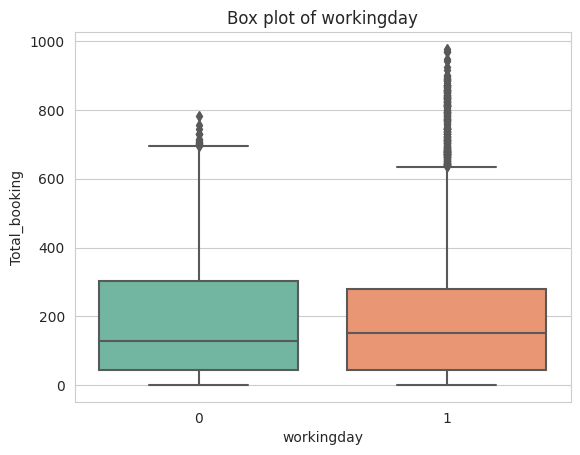

In [125]:
# Box plot - Working Day
sns.boxplot(x="workingday", y="Total_booking", data=train_df, palette="Set2")
#sns.set_style('whitegrid')
plt.title('Box plot of workingday')
plt.suptitle('')
plt.show()

### Inference: WorkingDay Box plot
As the WorkingDay is a binary column with only values 0 or 1, there is no significant difference in the distribution of the numerical data for the two values of 'workingday'.

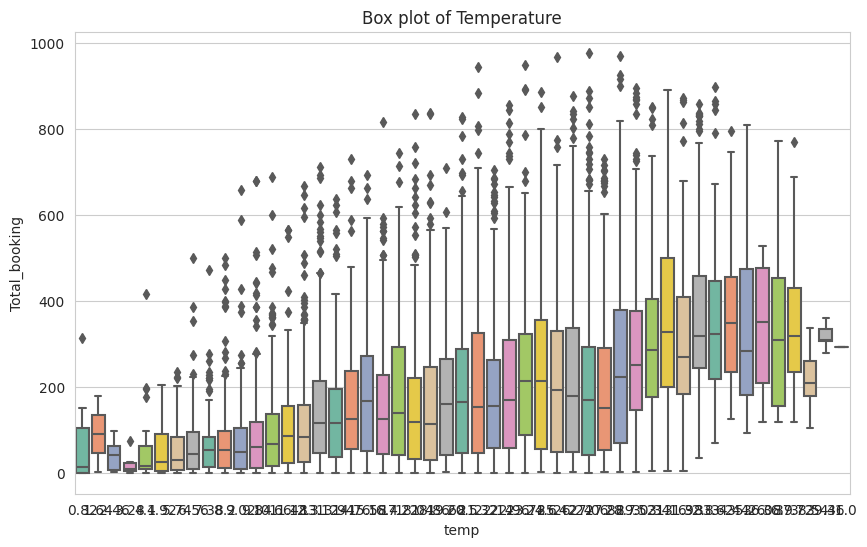

In [142]:
# Box plot - Temp
plt.figure(figsize=(10, 6))
sns.boxplot(x="temp", y = 'Total_booking', data=train_df, palette="Set2")
#sns.set_style('whitegrid')
plt.title('Box plot of Temperature')
plt.suptitle('')
plt.show()

### Inference: Temperature Box plot
As the Temparature rises, the Cab bookings increased.

In [ ]:
# Box plot - aTemp

In [ ]:
# Box plot - Humidity

In [ ]:
# Box plot - Windspeed

## b. Remove the outliers present in the dataset

In [146]:
def outlier_value_range_detection(num_data_input_col):
    sorted(num_data_input_col)
    Q1,Q3 = np.percentile(num_data_input_col,[25,75])
    IQR = Q3-Q1 #INTER QUARTILE RANGE
    min_value = Q1 - (1.5*IQR)
    max_value = Q3 + (1.5*IQR)
    return min_value,max_value

In [157]:
# # calculate the frequency of each season
# season_counts = train_df['season'].value_counts()

# # identify the underrepresented seasons as outliers
# outliers = season_counts[season_counts < season_counts.mean() - 2 * season_counts.std()].index
# print(outliers)
# # remove the outlier seasons from the dataset
# df = train_df[~train_df['season'].isin(outliers)]
# print(df['season'].value_counts())
# print(train_df['season'].value_counts())

In [152]:
# Outlier detection for Season column
print('Outlier detection for Season column')
# create a subset of the data for the Spring season
spring_df = train_df[train_df['season'] == 'Spring']

min_val, max_val = outlier_value_range_detection(spring_df["Total_booking"])
print("The minimum limit is :", min_val)
print("The maximum limit is :", max_val)

Outlier detection for Season column
The minimum limit is : -181.625
The maximum limit is : 371.375


In [149]:
# Outlier detection for Hour column
print('Outlier detection for Hour column')
min_val, max_val = outlier_value_range_detection(train_df["hour"])
print("The minimum limit is :", min_val)
print("The maximum limit is :", max_val)

Outlier detection for Hour column
The minimum limit is : -12.0
The maximum limit is : 36.0
